# TP_Clustering

##### Imports

In [17]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib import cm
warnings.filterwarnings('ignore')

##### Chargement des données

In [18]:
datas = pd.read_csv('./flickr_data.csv', sep=',', error_bad_lines=False)
X = datas.values
print(datas.head(4))

            id           user        lat      long  \
0  22653655033   77161041@N00  45.768121  4.801776   
1  22884818287  113280318@N03  45.759700  4.842200   
2  23277598065  132999708@N08  46.027633  4.699855   
3  22883485267  132999708@N08  46.027572  4.699966   

                                                tags  \
0  square,sierra,squareformat,iphoneography,insta...   
1  square,squareformat,iphoneography,instagramapp...   
2                                                NaN   
3                                                NaN   

                                               title   date_taken_minute  \
0             Enfin. #instabeer #beer #chimay #apero                  46   
1  https://www.facebook.com/PascalFrontiPhotograp...                   3   
2                         compagnons_dev_arnas20 (1)                   0   
3                         compagnons_dev_arnas20 (3)                   1   

    date_taken_hour   date_taken_day   date_taken_month   date_take

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


### Prétraitements

In [19]:
print(datas.shape)
datas = datas.drop_duplicates()
print(datas.shape)
datas_numpy = datas.values
tags = datas[" tags"]
X=[]

for index in range(0,len(tags)):
    print(index)
    try :
        line = str(tags[index]).split(",")
    except KeyError: 
        continue
    else :
        if "lyon" in line:
            X.append(datas_numpy[index])
X = np.array(X)
datas = pd.DataFrame(data=X, columns=datas.columns)
print(datas.head)

(83837, 16)
(15202, 16)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
27

3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742


7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742


12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
12082
12083
12084
12085
12086
12087
12088
12089
12090
12091
12092
12093
12094
12095
12096
12097
12098
12099
12100
12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
1220

In [20]:
BBox = ((datas[" long"].min(), datas[" long"].max(), datas[" lat"].min(), datas[" lat"].max()))
print(BBox)

(4.48064, 5.209128, 45.521988, 46.00843)


#### La Visualisation

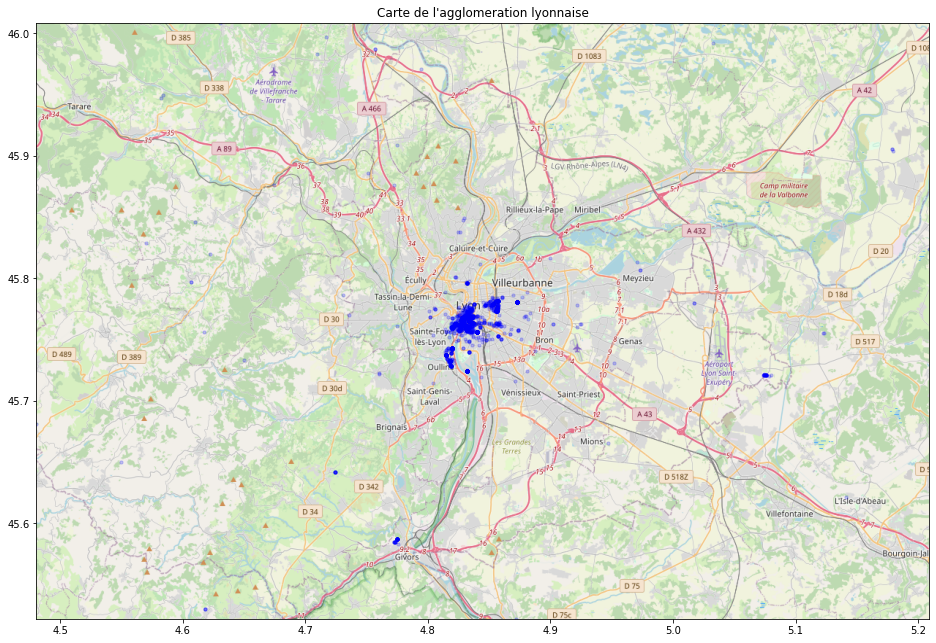

In [21]:
carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas[" long"], datas[" lat"], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

#### Le clustering

> On ne peut pas utiliser les K-Means, on ne connait pas le nombre de clusters. On va utiliser un algorithme qui se base sur la densité : DBSCAN.

In [32]:
dbscan = DBSCAN(eps=0.0001, min_samples=10)
lat = datas.iloc[:,2:3].values
long = datas.iloc[:,3:4].values
locations = datas.iloc[:,2:4].values
print(locations.shape)
clustering = dbscan.fit(locations)
print(clustering.labels_)

(1756, 2)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0  0 -1  0  0  0  0 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3 -1  3 -1 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1  5  5  5 -1  3  3  3 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  5  5  5  5  5  5  5  5  5 -1 -1 -1 -1 -1 -1 -1  6  6  6  6  6  6  6  6
  6  6  6  4  4  4 -1 -1 -1  5  5  5  5  5  5  5  5  5  4  4  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  5  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  7  7  7  7  7  7  7  7
  7  7  7  7 -1  7  7  7  7  7  7  7  7  

#### Visualisation du clustering

In [33]:
print(long.shape)
print(lat.shape)
print(clustering.labels_.shape)

ResultDict = {}
ResultDictLong = {}
ResultDictLat = {}
for index in range(0,len(clustering.labels_)):
    if not clustering.labels_[index] in ResultDict:
        ResultDict[clustering.labels_[index]] = []
        ResultDictLong[clustering.labels_[index]] = []
        ResultDictLat[clustering.labels_[index]] = []
    ResultDict[clustering.labels_[index]].append(np.array([long[index][0],lat[index][0]]))
    ResultDictLong[clustering.labels_[index]].append(long[index][0])
    ResultDictLat[clustering.labels_[index]].append(lat[index][0])
print(ResultDictLat[0])
print(ResultDict.keys())
print(ResultDictLong.keys())
print(ResultDictLat.keys())
print(ResultDict)

(1756, 1)
(1756, 1)
(1756,)
[45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618]
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
{-1: [array([ 4.849875, 45.763429]), array([ 4.814243, 45.739289]), array([ 4.833426, 45.76768 ]), array([ 4.82865 , 45.766411]), array([ 4.830411, 45.76613 ]), array([ 4.826677, 45.757019]), array([ 4.833261, 45.757411]), array([ 4.825838, 45.758544]), array([ 4.823827, 45.758241]), array([ 4.823333, 45.758113]), array([ 4.822825, 45.761963]), array([ 4.821797, 45.762227]), array([ 4.826811, 45.762966]), array([ 4.826908, 45.762947]), array([ 4.853981, 45.761353]), array([ 4.833576, 45.764738]), array([ 4.835293, 45.773622]), array([ 4.83

In [34]:
colors = cm.rainbow(np.linspace(0, 1, len(ResultDict.keys())))

colorsDict = {}
index = 0
for key in ResultDict:
    colorsDict[key] = colors[index]
    index +=1

print(colors)
print(colorsDict)

[[0.5        0.         1.         1.        ]
 [0.42156863 0.12288829 0.99810333 1.        ]
 [0.33529412 0.25584278 0.9916447  1.        ]
 [0.24901961 0.38410575 0.98063477 1.        ]
 [0.17058824 0.49465584 0.9667184  1.        ]
 [0.08431373 0.60753895 0.94717736 1.        ]
 [0.00196078 0.70928131 0.92328911 1.        ]
 [0.08039216 0.79053241 0.89789203 1.        ]
 [0.16666667 0.8660254  0.8660254  1.        ]
 [0.25294118 0.92563766 0.83018403 1.        ]
 [0.33137255 0.96512409 0.79428989 1.        ]
 [0.41764706 0.9916447  0.75133189 1.        ]
 [0.50392157 0.99998103 0.70492555 1.        ]
 [0.58235294 0.9916447  0.65992453 1.        ]
 [0.66862745 0.96512409 0.60753895 1.        ]
 [0.75490196 0.92090552 0.55236497 1.        ]
 [0.83333333 0.8660254  0.5        1.        ]
 [0.91960784 0.79053241 0.44021574 1.        ]
 [1.         0.70054304 0.37841105 1.        ]
 [1.         0.60753895 0.32071024 1.        ]
 [1.         0.49465584 0.25584278 1.        ]
 [1.         

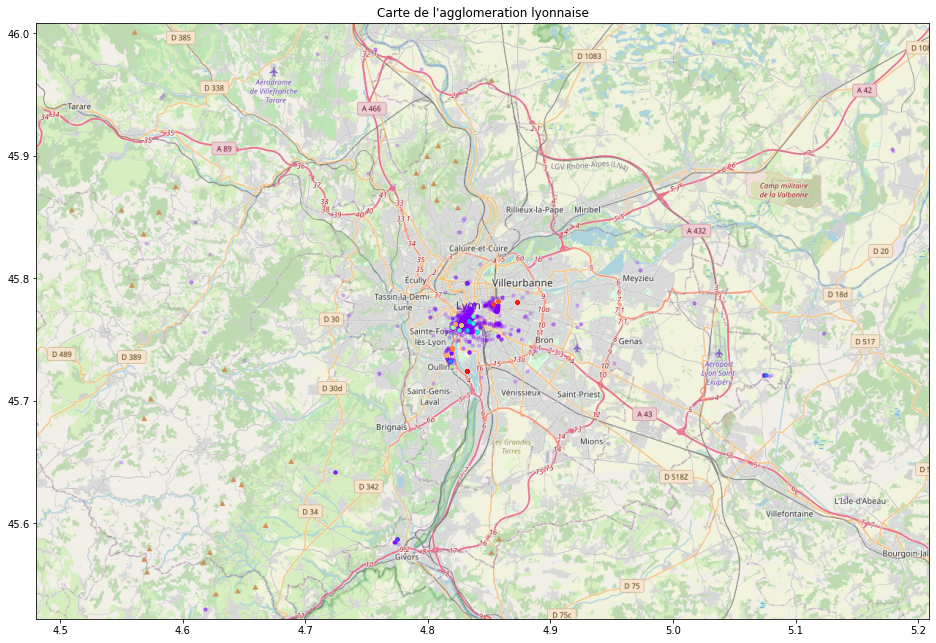

In [35]:

carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
for key in ResultDict:
    ax.scatter(ResultDictLong[key], ResultDictLat[key], zorder=1, alpha= 0.2, color=colorsDict[key], s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')